In [2]:
! pip install pandas
! pip install seaborn networkx
! pip install scikit-learn
! pip install Timer

In [116]:
import pandas as pd
import json
import glob
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

start_time = time.time()

# Путь к директории с файлами
path = "data/"

# Поиск всех файлов JSON в директории
all_files = glob.glob("D:/вшэ/магистратура/1 курс/soc/data/" + "mpd.slice.*.json")

# Инициализация словарей для хранения данных
playlist_dict = {}
track_dict = {}
artist_dict = {}

# Чтение каждого файла и добавление данных в словари
for filename in all_files:
    with open(filename, 'r') as file:
        playlists = json.load(file)
        for playlist in playlists['playlists']:
            if  playlist['num_followers'] > 5 and playlist['num_followers'] < 1000 and playlist['num_tracks'] > 5 and playlist['num_tracks'] < 150 and playlist['num_albums'] > 1 and playlist['num_artists'] > 1:
                playlist_tracks = [{'track_uri': track['track_uri']} for track in playlist['tracks']]
                playlist_dict[playlist['pid']] = {
                    'pid': playlist['pid'],
                    'name': playlist['name'],
                    'collaborative': playlist['collaborative'],
                    'modified_at': playlist['modified_at'],
                    'num_artists': playlist['num_artists'],
                    'num_albums': playlist['num_albums'],
                    'num_tracks': playlist['num_tracks'],
                    'num_followers': playlist['num_followers'],
                    'num_edits': playlist['num_edits'],
                    'duration_ms': playlist['duration_ms'],
                    'tracks': playlist_tracks
                }
                for track in playlist['tracks']:
                    track_uri = track['track_uri']
                    if track_uri not in track_dict:
                        track_dict[track_uri] = {'playlists': set()}
                    track_dict[track_uri]['playlists'].add(playlist['pid'])
                    
                    artist_uri = track['artist_uri']
                    if artist_uri not in artist_dict:
                        artist_dict[artist_uri] = {
                            'playlists': set()
                        }
                    artist_dict[artist_uri]['playlists'].add(playlist['pid'])



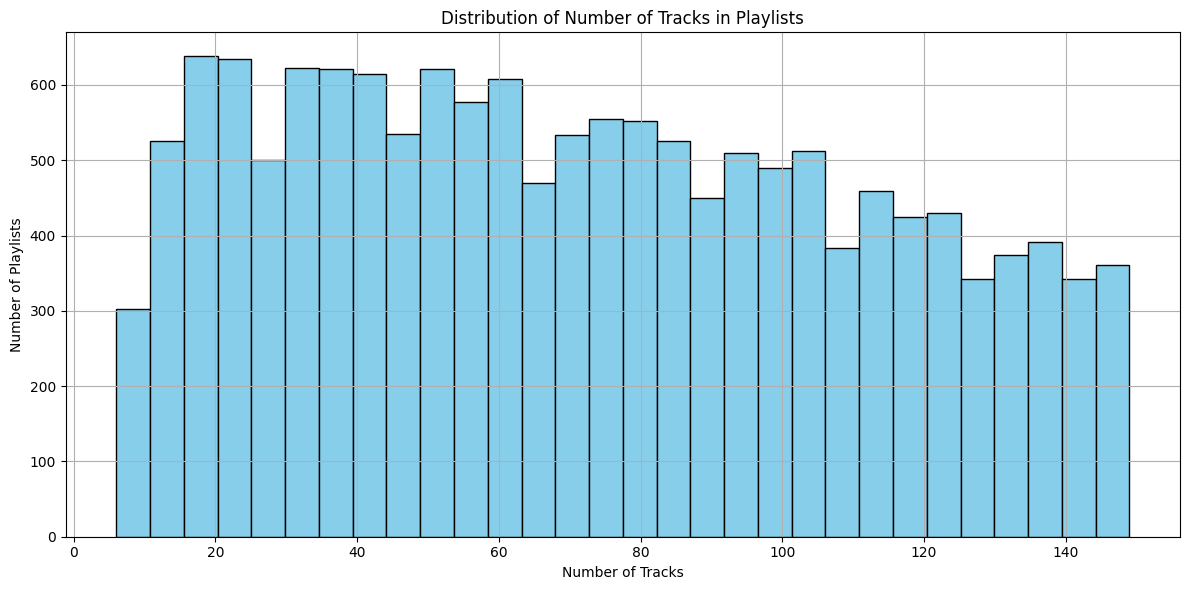

In [117]:
num_tracks = [playlist['num_tracks'] for playlist in playlist_dict.values()]

# Визуализация количества треков в плейлистах с использованием гистограммы
plt.figure(figsize=(12, 6))
plt.hist(num_tracks, bins=30, color='skyblue', edgecolor='black')  # Используем гистограмму с 30 бинами
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Playlists')
plt.title('Distribution of Number of Tracks in Playlists')
plt.grid(True)
plt.tight_layout()
plt.show()

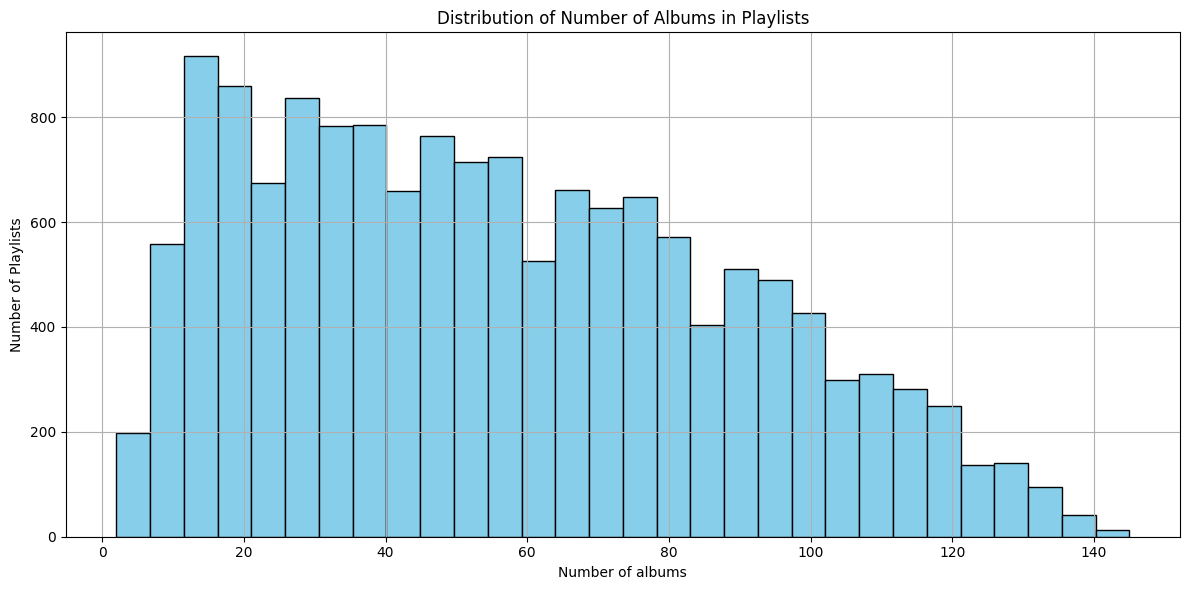

In [118]:
num_albums = [playlist['num_albums'] for playlist in playlist_dict.values()]

# Визуализация количества треков в плейлистах с использованием гистограммы
plt.figure(figsize=(12, 6))
plt.hist(num_albums, bins=30, color='skyblue', edgecolor='black')  # Используем гистограмму с 30 бинами
plt.xlabel('Number of albums')
plt.ylabel('Number of Playlists')
plt.title('Distribution of Number of Albums in Playlists')
plt.grid(True)
plt.tight_layout()
plt.show()

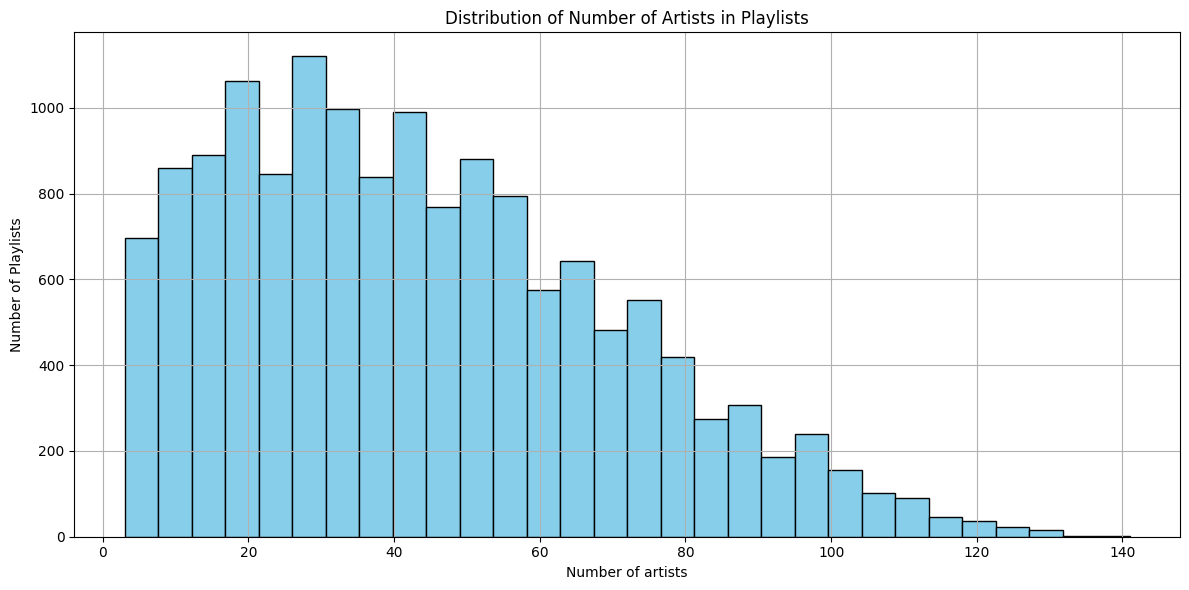

In [119]:
num_artists = [playlist['num_artists'] for playlist in playlist_dict.values()]

# Визуализация количества треков в плейлистах с использованием гистограммы
plt.figure(figsize=(12, 6))
plt.hist(num_artists, bins=30, color='skyblue', edgecolor='black')  # Используем гистограмму с 30 бинами
plt.xlabel('Number of artists')
plt.ylabel('Number of Playlists')
plt.title('Distribution of Number of Artists in Playlists')
plt.grid(True)
plt.tight_layout()
plt.show()

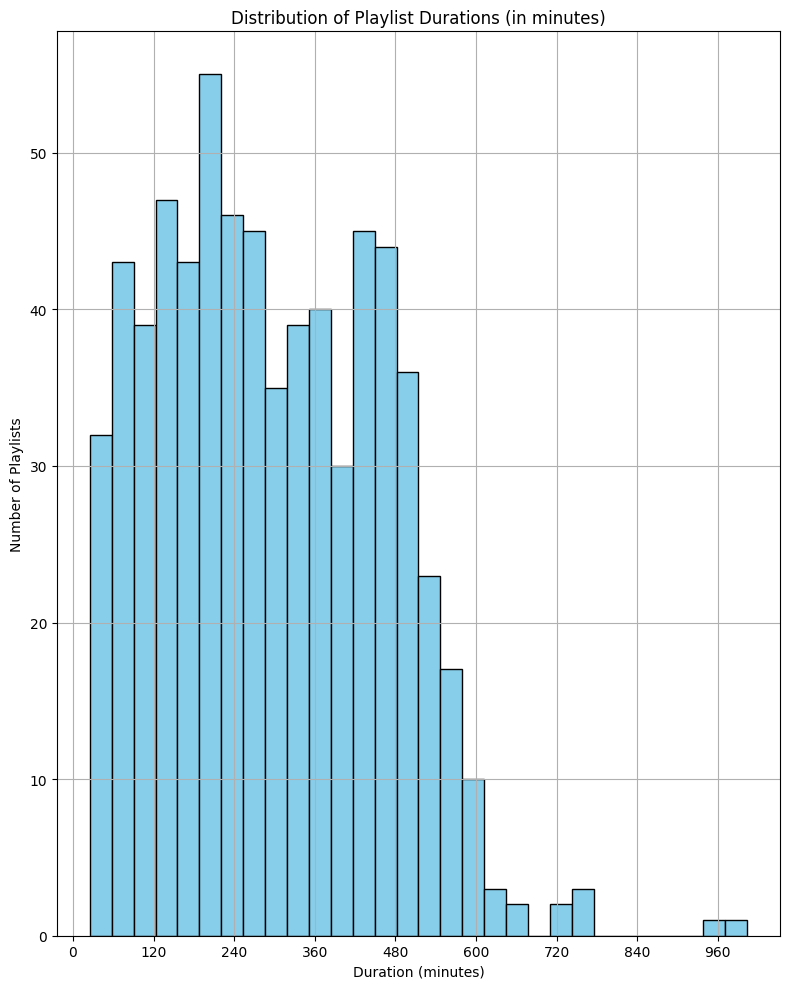

In [102]:
dur_ms = [playlist['duration_ms'] for playlist in playlist_dict.values()]

import matplotlib.pyplot as plt

# Переводим длительность из миллисекунд в минуты
dur_min = [dur / 60000 for dur in dur_ms]

# Визуализация количества треков в плейлистах с использованием гистограммы
# Визуализация количества треков в плейлистах с использованием гистограммы
plt.figure(figsize=(8, 10))
plt.hist(dur_min, bins=30, color='skyblue', edgecolor='black')  # Используем гистограмму с 30 бинами
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Playlists')
plt.title('Distribution of Playlist Durations (in minutes)')
plt.grid(True)

# Задаем интервалы делений на оси x, начиная с 0 с шагом 2 минуты
plt.xticks(range(0, int(max(dur_min)) + 1, 120))

plt.tight_layout()
plt.show()


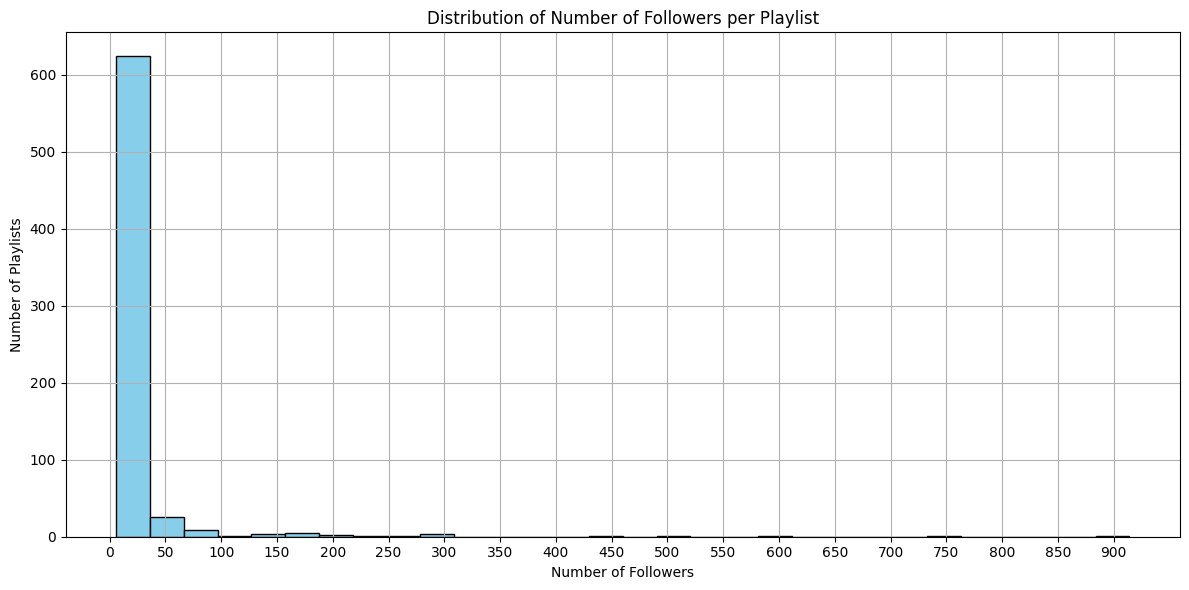

In [120]:
# Получение списка количества подписчиков из графа
num_followers_list = [G.nodes[pid]['num_followers'] for pid in G.nodes]

# Визуализация количества плейлистов по количеству подписчиков с использованием гистограммы
plt.figure(figsize=(12, 6))
plt.hist(num_followers_list, bins=30, color='skyblue', edgecolor='black')  # Используем гистограмму с 30 бинами
plt.xlabel('Number of Followers')
plt.ylabel('Number of Playlists')
plt.title('Distribution of Number of Followers per Playlist')
plt.grid(True)

# Задаем интервалы делений на оси x, начиная с 0 с шагом 50 подписчиков
plt.xticks(range(0, int(max(num_followers_list)) + 1, 50))

plt.tight_layout()
plt.show()

In [121]:
for pid in playlist_dict:
    playlist_dict[pid]['collaborative'] = 1 if playlist_dict[pid]['collaborative'] == 'true' else 0

len(playlist_dict)

14904

In [122]:
# Создание графа плейлистов
G = nx.Graph()
for pid, playlist in playlist_dict.items():
    G.add_node(pid,
               name=playlist['name'], 
               num_followers=playlist['num_followers'], 
               collaborative=playlist['collaborative'],
               num_tracks=playlist['num_tracks'],
               num_albums=playlist['num_albums'],
               modified_at=playlist['modified_at'],
               num_artists=playlist['num_artists'],
               num_edits=playlist['num_edits'],
               duration_ms=playlist['duration_ms']
              ),

In [123]:
for track_uri, track_info in track_dict.items():
    playlists_with_track = list(track_info['playlists'])
    for i in range(len(playlists_with_track)):
        for j in range(i + 1, len(playlists_with_track)):
            pid1, pid2 = playlists_with_track[i], playlists_with_track[j]
            if G.has_edge(pid1, pid2):
                G[pid1][pid2]['weight'] += 1
            else:
                G.add_edge(pid1, pid2, weight=1)

for artist_uri, artist_info in artist_dict.items():
    playlists_with_artist = list(track_info['playlists'])
    for i in range(len(playlists_with_artist)):
        for j in range(i + 1, len(playlists_with_artist)):
            pid1, pid2 = playlists_with_artist[i], playlists_with_artist[j]
            if G.has_edge(pid1, pid2):
                G[pid1][pid2]['weight'] += 1
            else:
                G.add_edge(pid1, pid2, weight=1)

In [124]:
print("Вычисление центральности и других метрик графа")
# Вычисление центральности и других метрик графа
centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, centrality, 'centrality')


Вычисление центральности и других метрик графа


In [125]:
print("Преобразование данных графа в DataFrame")
# Преобразование данных графа в DataFrame
graph_data = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
print(graph_data.head())

Преобразование данных графа в DataFrame
              name  num_followers  collaborative  num_tracks  num_albums  \
28            Yeet              7              0          81          57   
40            2020              6              0          85          80   
166         motown              7              0          55          51   
223       classics             10              0         120         106   
255  Christmas Mix             22              0          32          28   

     modified_at  num_artists  num_edits  duration_ms  centrality  
28    1509062400           37         26     18831207    0.235859  
40    1490659200           71         27     18672695    0.297121  
166   1466467200           41          5     12866664    0.126954  
223   1505692800           76         37     29870133    0.149769  
255   1387152000           25          3      6772221    0.013621  


In [126]:
print("Подготовка данных для обучения модели")
from sklearn.linear_model import LinearRegression
# Подготовка данных для обучения модели
X = graph_data[['centrality', 'collaborative', 'num_tracks', 'num_albums', 'modified_at', 'num_artists', 'num_edits', 'duration_ms']].fillna(0)
y = graph_data['num_followers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

Подготовка данных для обучения модели


LinearRegression()

In [127]:
X_train

,centrality,collaborative,num_tracks,num_albums,modified_at,num_artists,num_edits,duration_ms
491185,0.061934,0,127,122,1496016000,82,101,35601357
342930,0.000872,0,46,44,1505174400,36,25,15775500
346741,0.160639,0,127,122,1507075200,82,64,29892734
35907,0.035429,0,112,74,1507507200,58,42,37042564
263229,0.028182,0,30,24,1392076800,16,21,6720954
...,...,...,...,...,...,...,...,...
152165,0.061867,0,134,127,1507939200,78,50,39955670
408415,0.056901,0,33,15,1466640000,9,5,6926740
830144,0.001610,0,25,17,1508889600,8,6,6919985
110952,0.220962,0,113,82,1508630400,62,19,25348024


In [128]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 5420.531590650369
R^2 Score: 0.008471130925113757


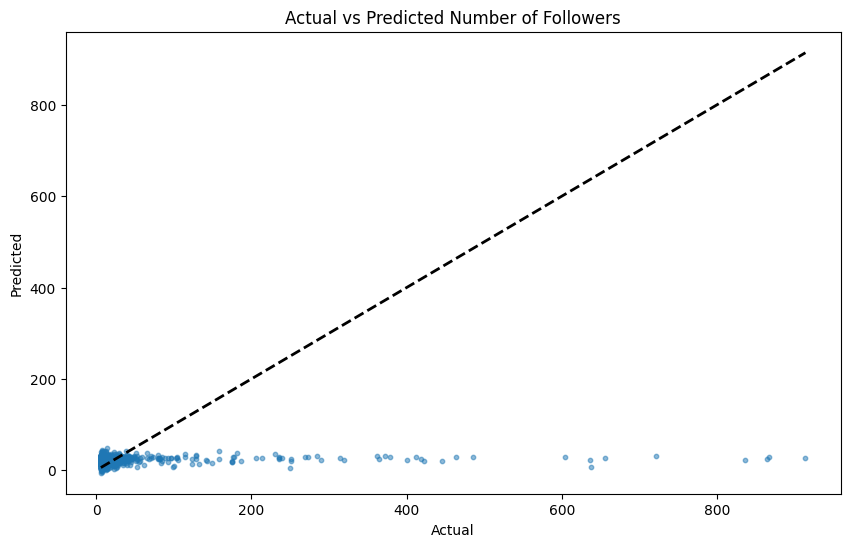

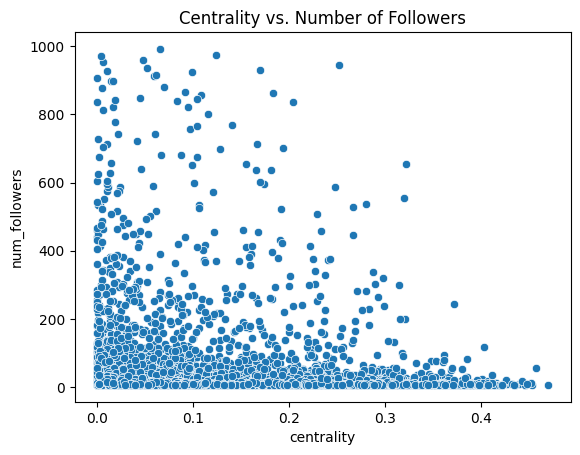

Elapsed time: 278.6871268749237 seconds


In [129]:
# Визуализация результатов с уменьшенным масштабом точек и повышенной прозрачностью
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=10)  # Уменьшаем размер точек и повышаем прозрачность
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Number of Followers')
plt.show()

sns.scatterplot(x='centrality', y='num_followers', data=graph_data)
plt.title('Centrality vs. Number of Followers')
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

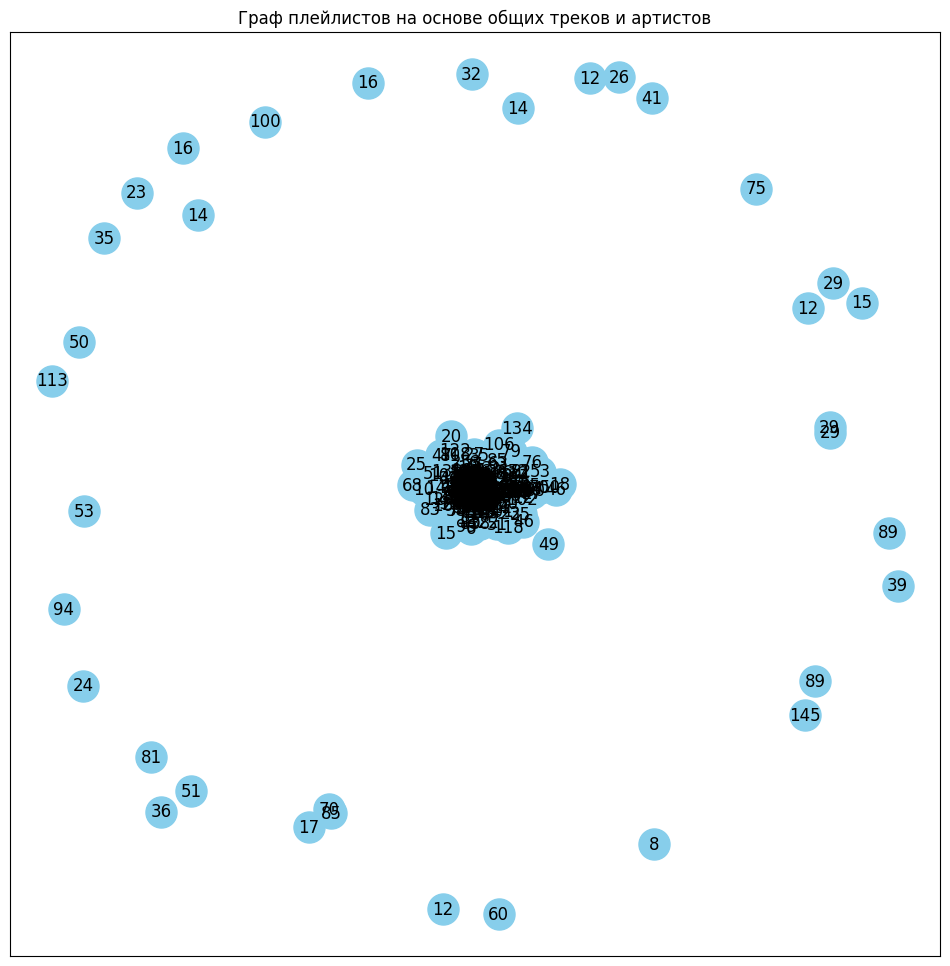

In [115]:
# Визуализация графа с количеством треков в качестве меток
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

# Рисование узлов и рёбер
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=0.05, alpha=0.5)

# Использование количества треков в качестве меток узлов
labels = {pid: f"{playlist['num_tracks']}" for pid, playlist in playlist_dict.items()}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

# Настройка заголовка и отображение графика
plt.title('Граф плейлистов на основе общих треков и артистов')
plt.show()